# Linear Regression

## Exercises

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline

####First Anscombe dataset
Have a look at the first Anscombe dataset, and fit a linear model to the data.
- Plot the data
- Fit a linear model
- Find the $R^2$ of the correlation between $x$ and $y$
- Write down the formula $y = ax + b$ and find $a$ and $b$
- Do you think this is a reasonable model for the data?
- Given this model, what $y$ would you expect for a point with $x = 10$?
- (*) Compute the mean absolute error (MAE) and what is the mean square error (MSE)
- (**) Show that indeed, $R^2 = 1 - \text{MSE}/\text{Var}(y)$

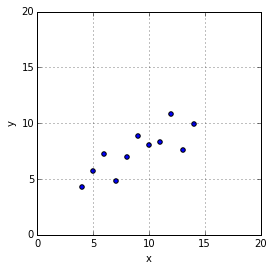

In [2]:
data = pd.DataFrame({'x': [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
     'y': [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]})
f = data.plot(kind='scatter', x='x', y='y', figsize=(4,4), xlim=(0, 20), ylim=(0, 20))

In [3]:
X, y = data[['x']], data.y
model = LinearRegression().fit(X, y)
model.score(X, y)

0.66654245950877478

In [4]:
print model.intercept_, model.coef_

3.00009090909 [ 0.50009091]


In [5]:
# Hence: y = 0.5 x + 3

In [6]:
model.predict(10)

array([ 8.001])

In [7]:
import numpy as np
y_pred = model.predict(X)
MAE = np.abs(y_pred - y).mean()
MSE = np.square(y_pred - y).mean()
print MAE, MSE

0.837404958678 1.25115363636


In [8]:
var_y = np.square(y - y.mean()).mean()
R2 = 1 - MSE / var_y
R2

0.66654245950877478

In [9]:
model.score(X, y)

0.66654245950877478

#### Boston

In this exercise, we'll use one of sklearn's standard datasets to analyze Boston house prices.

In [10]:
from sklearn.datasets import load_boston
boston = load_boston()
X, y = boston.data, boston.target
features = boston.feature_names
# print boston.DESCR  # print this to get information on the dataset

- Let's make a histogram of all house prices in the dataset. 
- It's a little unclear in what units the prices are, let's assume it's in $K.

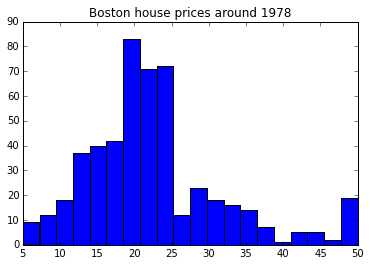

In [11]:
f = plt.hist(y, bins=20)
f = plt.title("Boston house prices around 1978")

- Find a linear model that fits the data, and with which you feel comfortable.
- Compute the $R^2$ of the model with and without cross-validation
- (*) Compute the MAE and MSE of the model as well
- Prices often behave expontential, rather than linear (people often say +2%, rather than +\$200). Let's try modeling the logarithm of the price and see if that improves your model: `y = np.log(boston.target)` 

- (*) How much more worth would a house be in a crime-free community, compared to the same house in a community with a crime rate of 6 per resident? (Note that this might not be a fair analysis as features might correlate with themselves  as well.)
- (**) What would be a good way of analyzing which feature has the biggest influence on the house price?

In [12]:
model = LinearRegression()
print model.fit(X, y).score(X, y)
from sklearn.cross_validation import train_test_split
for k in xrange(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)
    print model.fit(X_train, y_train).score(X_test, y_test).round(3), 

0.740607742865
0.756 0.773 0.749 0.798 0.662 0.706 0.715 0.639 0.793 0.736


Seems good to me!

In [13]:
y_pred = model.predict(X)
MAE = np.abs(y - y_pred).mean()
MSE = np.square(y_pred - y).mean()
print MAE, MSE

3.32528748393 22.132180361


In [14]:
model = LinearRegression()
y = np.log(boston.target)
print model.fit(X, y).score(X, y)
from sklearn.cross_validation import cross_val_score, train_test_split
for k in xrange(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)
    print model.fit(X_train, y_train).score(X_test, y_test).round(3), 

0.789578558952
0.732 0.75 0.765 0.775 0.788 0.705 0.824 0.767 0.798 0.784


Not bad at all!

In [15]:
zip(boston.feature_names, model.coef_)

[('CRIM', -0.010795505539240269),
 ('ZN', 0.00094844062565703252),
 ('INDUS', 0.0023640474783938256),
 ('CHAS', 0.10157558970278166),
 ('NOX', -0.82272556822441245),
 ('RM', 0.11276088041278803),
 ('AGE', -4.0786174271081627e-05),
 ('DIS', -0.047849679687835184),
 ('RAD', 0.014939220827682629),
 ('TAX', -0.00064858543031262096),
 ('PTRATIO', -0.041294565274673248),
 ('B', 0.00044830440888611996),
 ('LSTAT', -0.024522844402722489)]

In [16]:
6 * model.coef_[0]  # this is the +/- impact on log price

-0.064773033235441618

In [17]:
np.exp(6 * model.coef_[0]) - 1  # this is the % impact on price

-0.06271982931442921

In [18]:
boston.target.mean() * (np.exp(6 * model.coef_[0]) - 1)

-1.4132537666233127

A house would be 6% cheaper, or \$1300 on an average sale. If you didn't model the log price, you could have found something like $650 cheaper. Note that these numbers are quite different. This is probably caused by the fact that the features are not independent.

- For analyzing which feature has the biggest influence on the house price, we could look at the coefficients of the features.
- But we need to decide how we compare different features: Is \$20 per crime mean a bigger influence than \$300 per year of house age?
- We might want to transform all features to the same scale first.
- We use `StandardScaler` which scales all data to mean 0, and standard deviation 1

In [19]:
from sklearn.preprocessing import StandardScaler 
X_scaled = StandardScaler().fit_transform(X).round(3)  # rescales columns to mean = 0, and std = 1

Note that this does not affect the modeling performance at all

In [20]:
print model.fit(X, y).score(X, y)
print model.fit(X_scaled, y).score(X_scaled, y)

0.789578558952
0.789582586181


But it obviously does affact the coefficients.

In [21]:
sorted(zip(model.coef_, boston.feature_names))

[(-0.20758544921258554, 'LSTAT'),
 (-0.10527558570457664, 'TAX'),
 (-0.10333519334072219, 'DIS'),
 (-0.09046979968667887, 'NOX'),
 (-0.087680610112145785, 'CRIM'),
 (-0.0829188164061887, 'PTRATIO'),
 (0.0061015273718776075, 'AGE'),
 (0.01710108980993524, 'INDUS'),
 (0.025640165355663692, 'CHAS'),
 (0.027282023397004876, 'ZN'),
 (0.038402675962402322, 'B'),
 (0.063415705245153969, 'RM'),
 (0.12388223357270044, 'RAD')]

We find that
- % lower status of the population (`LSTAT`)  has the highest (negative) influence on the house prices, closely followed by
- accessibility to radial highways (`RAD`), which has the highest positive influence on the house prices.